# Pre-Processing

In [34]:
# Init pack
#run the model without additional noise, plot the same intial conditions observe if the determinstic emulation matches the physical model
#emulator smooths out to a state in the same way as the physical model

import numpy as np
import numpy as np
from scipy.integrate import solve_ivp
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import sys
import torch
import matplotlib.pyplot as plt
from scipy.stats import linregress
from tqdm import tqdm


psi = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')
print(psi.shape)

# psi = psi[:,1,:]
print(psi.shape)

# Normalization
mean_psi = np.mean(psi, axis=0, keepdims=True)
std_psi = np.std(psi, axis=0, keepdims=True)
normalized_psi = (psi - mean_psi) / std_psi


# Pre-processing
lead = 1

trainN = 300000
valN = 50000
index = 63


psi_train_input = torch.tensor(psi[0:trainN, :], dtype=torch.float32)
# print(psi_train_input.shape)
# plt.plot(psi_train_input[:,63])
# psi_train_label =  torch.tensor(psi[lead:trainN+lead, :], dtype=torch.float32)
# plt.plot(psi_train_label[:,63], color='r')

# Make sure input and label lengths match
# assert psi_train_input.shape[0] == psi_train_label.shape[0], "Input and label length mismatch"

#shuffle and map indices\
# valid_indices = np.arange(0, trainN - lead)
# np.random.seed(42)  # Optional for reproducibility
# shuffled_indices = np.random.permutation(valid_indices)

psi_train_input = torch.tensor(psi[0:trainN, :], dtype=torch.float32)
psi_train_label = torch.tensor(psi[lead: trainN + lead, :], dtype=torch.float32)

# print(torch.allclose(psi_train_input[0], torch.tensor(psi[t], dtype=torch.float32)))
# print(torch.allclose(psi_train_label[0], torch.tensor(psi[t + 1], dtype=torch.float32)))

psi_val_input = torch.tensor(psi[trainN:trainN+valN], dtype=torch.float32)
psi_val_label = torch.tensor(psi[trainN+lead:trainN+valN+lead], dtype=torch.float32)

print(psi_train_input.shape)
print(psi_train_label.shape)
print(psi_val_input.shape)
print(psi_val_label.shape)
plt.show()
# plt.plot(psi_val_input[0:50000,63]

(1000000, 75)
(1000000, 75)
torch.Size([300000, 75])
torch.Size([300000, 75])
torch.Size([50000, 75])
torch.Size([50000, 75])


# Model Architecture

In [ ]:
# Define the decoder (MLP)
class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + condition_dim, 512)  
        self.fc2 = nn.Linear(512, 512)  
        self.fc3 = nn.Linear(512, 512) 
        self.fc4 = nn.Linear(512, 512)  
        self.fc5 = nn.Linear(512, 512)  
        self.fc6 = nn.Linear(512, 512)  
        self.fc_output = nn.Linear(512, output_dim)

    def forward(self, z, condition):
        z = torch.cat((z, condition), dim=1)  # Concatenate latent vector and condition
        z = torch.relu(self.fc1(z))  # Activation function for hidden layer
        z = torch.relu(self.fc2(z)) + z
        z = torch.relu(self.fc3(z)) + z
        z = torch.relu(self.fc4(z)) + z
        z = torch.relu(self.fc5(z)) + z
        z = torch.relu(self.fc6(z)) + z
        output = self.fc_output(z)
        return output

# Define the LatentDecoder class
class LatentDecoder(nn.Module):
    def __init__(self, latent_dim, output_dim, condition_dim):
        super(LatentDecoder, self).__init__()
        self.decoder = Decoder(latent_dim, output_dim, condition_dim)

    def decode(self, z, condition):
        return self.decoder(z, condition)

    def forward(self, z, condition,):
        output = self.decode(z, condition)
        return output

output_dim = 75
latent_dim = 1024
condition_dim = 75
batch_size = 100
num_epochs = 1000

[[ 0.38258931  0.32765501  0.31953313 ...  0.73871885  0.72737506
   0.72067436]
 [ 0.3752723   0.33801305  0.33889876 ...  0.74271456  0.73278321
   0.72694882]
 [ 0.36184598  0.35426679  0.36396712 ...  0.74516353  0.73647832
   0.73141576]
 ...
 [-1.69215948 -1.70123654 -1.71099619 ... -1.61964385 -1.60445602
  -1.59400927]
 [-1.655558   -1.67504303 -1.69489999 ... -1.6425658  -1.62844813
  -1.61842255]
 [-1.62607985 -1.65404676 -1.68247418 ... -1.65497329 -1.64201201
  -1.63262646]]


# Initialize Model and Set Folder Path

In [5]:
import datetime
import os
# init the model and optimizer
model = LatentDecoder(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"model_at_{timestamp}"
model_weights_path = f'{folder}/model_weights_pytorch.pth'
os.makedirs(folder)

# Training

Reference Real Data average_transition_time: 3780.0461538461536
Epoch 1, 
        Reconstrunction Loss: 0.0011091745691373944

        Validation Reconstrunction Loss: 0.24407251179218292


Mini Inference at Epoch 0: 100%|██████████| 100/100 [00:00<00:00, 1243.23it/s]


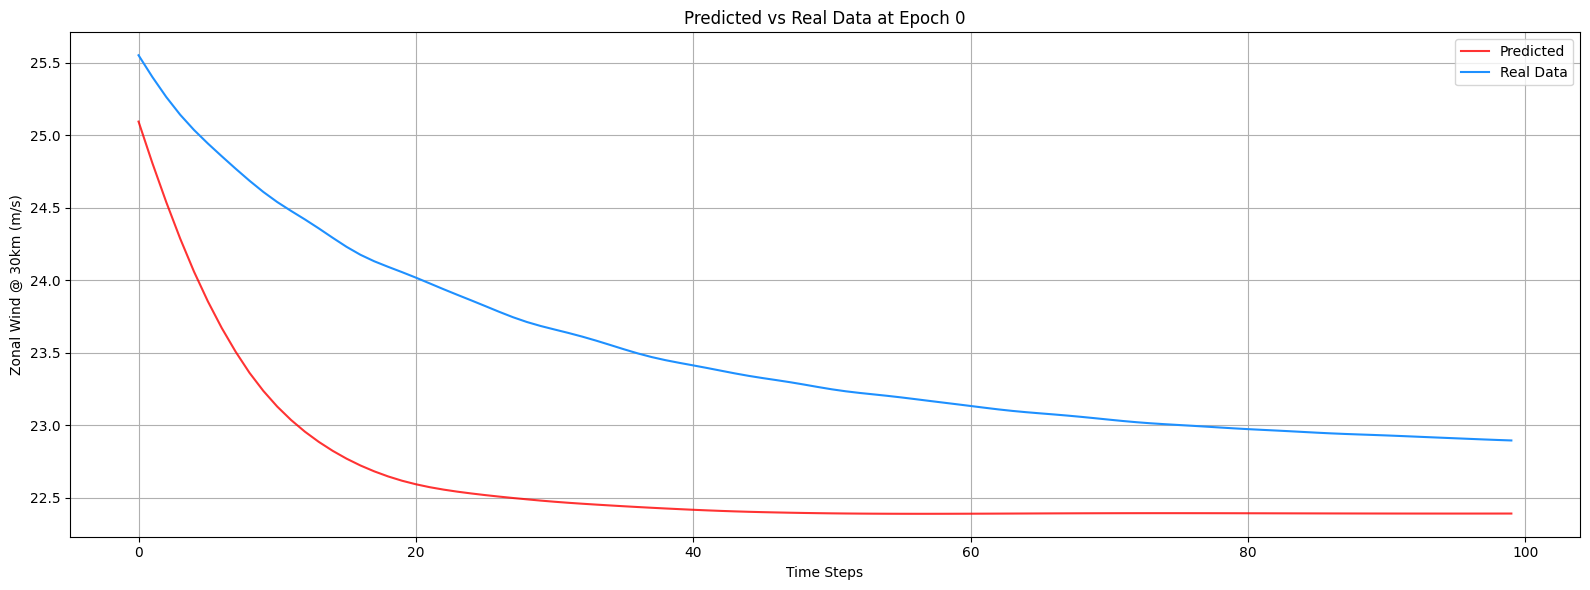

Epoch 2, 
        Reconstrunction Loss: 0.0011128156911581755

        Validation Reconstrunction Loss: 0.1907760053873062
Epoch 3, 
        Reconstrunction Loss: 0.0011517438106238842

        Validation Reconstrunction Loss: 0.3813142478466034
Epoch 4, 
        Reconstrunction Loss: 0.001118059386499226

        Validation Reconstrunction Loss: 0.21928291022777557
Epoch 5, 
        Reconstrunction Loss: 0.0011351375142112374

        Validation Reconstrunction Loss: 0.19908800721168518
Epoch 6, 
        Reconstrunction Loss: 0.0011064803693443537

        Validation Reconstrunction Loss: 0.2604738771915436
Epoch 7, 
        Reconstrunction Loss: 0.0010944046080112457

        Validation Reconstrunction Loss: 0.23272526264190674
Epoch 8, 
        Reconstrunction Loss: 0.0011199882719665766

        Validation Reconstrunction Loss: 0.24776875972747803
Epoch 9, 
        Reconstrunction Loss: 0.0011301980121061206

        Validation Reconstrunction Loss: 0.16823437809944153
Epoch 10, 
 

Mini Inference at Epoch 10: 100%|██████████| 100/100 [00:00<00:00, 1272.82it/s]


<Figure size 640x480 with 0 Axes>

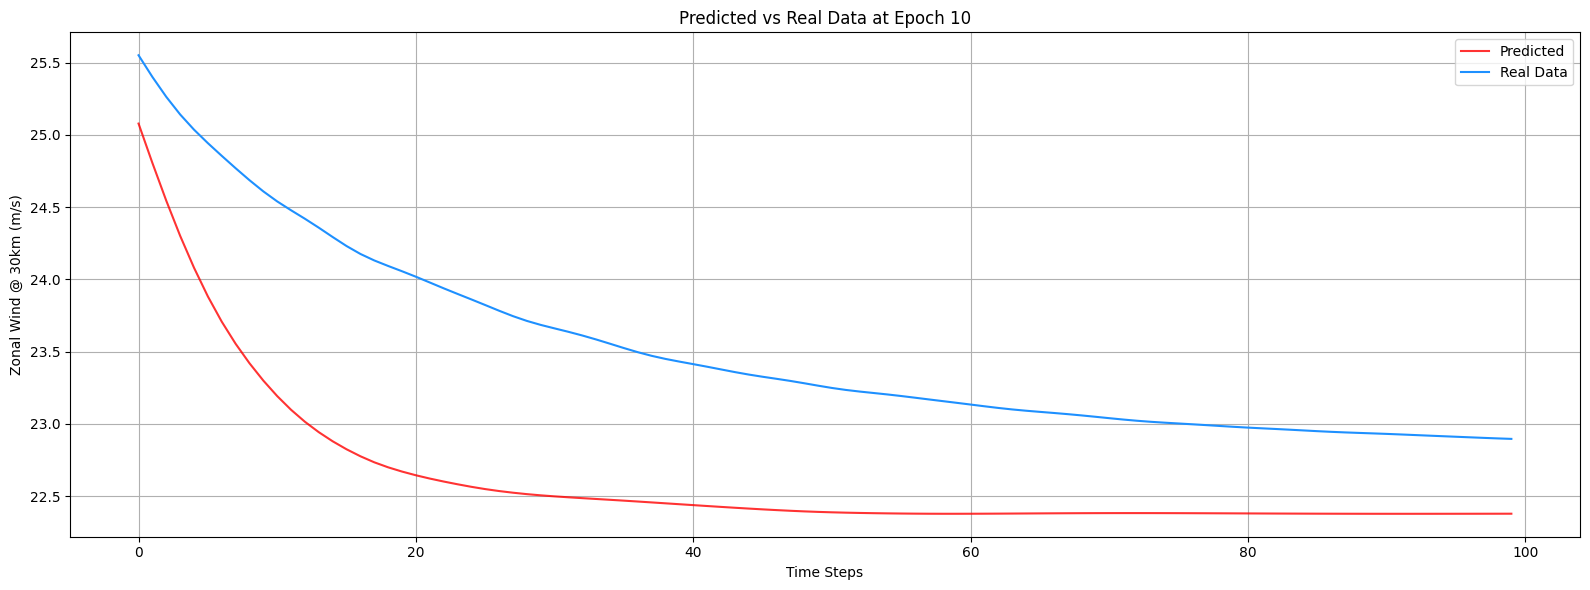

Epoch 12, 
        Reconstrunction Loss: 0.0011636166600510478

        Validation Reconstrunction Loss: 0.21649198234081268
Epoch 13, 
        Reconstrunction Loss: 0.0011024883715435863

        Validation Reconstrunction Loss: 0.1939721405506134
Epoch 14, 
        Reconstrunction Loss: 0.0011060981778427958

        Validation Reconstrunction Loss: 0.3245440721511841
Epoch 15, 
        Reconstrunction Loss: 0.0011094544315710664

        Validation Reconstrunction Loss: 0.29626914858818054
Epoch 16, 
        Reconstrunction Loss: 0.0011283090570941567

        Validation Reconstrunction Loss: 0.23812595009803772
Epoch 17, 
        Reconstrunction Loss: 0.0010869670659303665

        Validation Reconstrunction Loss: 0.38525983691215515
Epoch 18, 
        Reconstrunction Loss: 0.0011182795278728008

        Validation Reconstrunction Loss: 0.30601608753204346
Epoch 19, 
        Reconstrunction Loss: 0.0010927022667601705

        Validation Reconstrunction Loss: 0.28728172183036804
Ep

Mini Inference at Epoch 20: 100%|██████████| 100/100 [00:00<00:00, 1239.24it/s]


<Figure size 640x480 with 0 Axes>

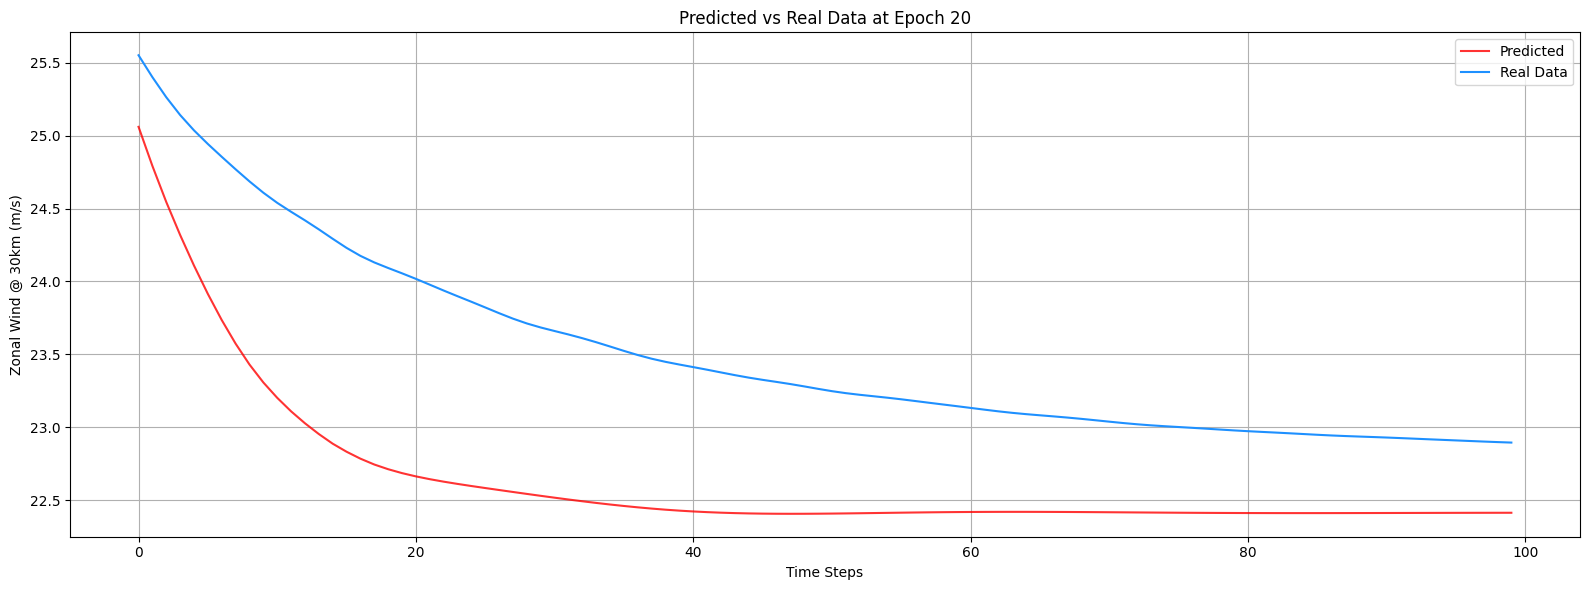

Epoch 22, 
        Reconstrunction Loss: 0.0011107902973890305

        Validation Reconstrunction Loss: 0.26627787947654724
Epoch 23, 
        Reconstrunction Loss: 0.001133736688643694

        Validation Reconstrunction Loss: 0.2533716857433319
Epoch 24, 
        Reconstrunction Loss: 0.0010997290955856442

        Validation Reconstrunction Loss: 0.3227771520614624
Epoch 25, 
        Reconstrunction Loss: 0.0011263183550909162

        Validation Reconstrunction Loss: 0.35261937975883484
Epoch 26, 
        Reconstrunction Loss: 0.0011445563286542892

        Validation Reconstrunction Loss: 0.3069397211074829
Epoch 27, 
        Reconstrunction Loss: 0.0011272527044638991

        Validation Reconstrunction Loss: 0.27191558480262756
Epoch 28, 
        Reconstrunction Loss: 0.0011109040351584554

        Validation Reconstrunction Loss: 0.4929105341434479
Epoch 29, 
        Reconstrunction Loss: 0.0011178581044077873

        Validation Reconstrunction Loss: 0.2389942854642868
Epoch 

Mini Inference at Epoch 30: 100%|██████████| 100/100 [00:00<00:00, 1274.37it/s]


<Figure size 640x480 with 0 Axes>

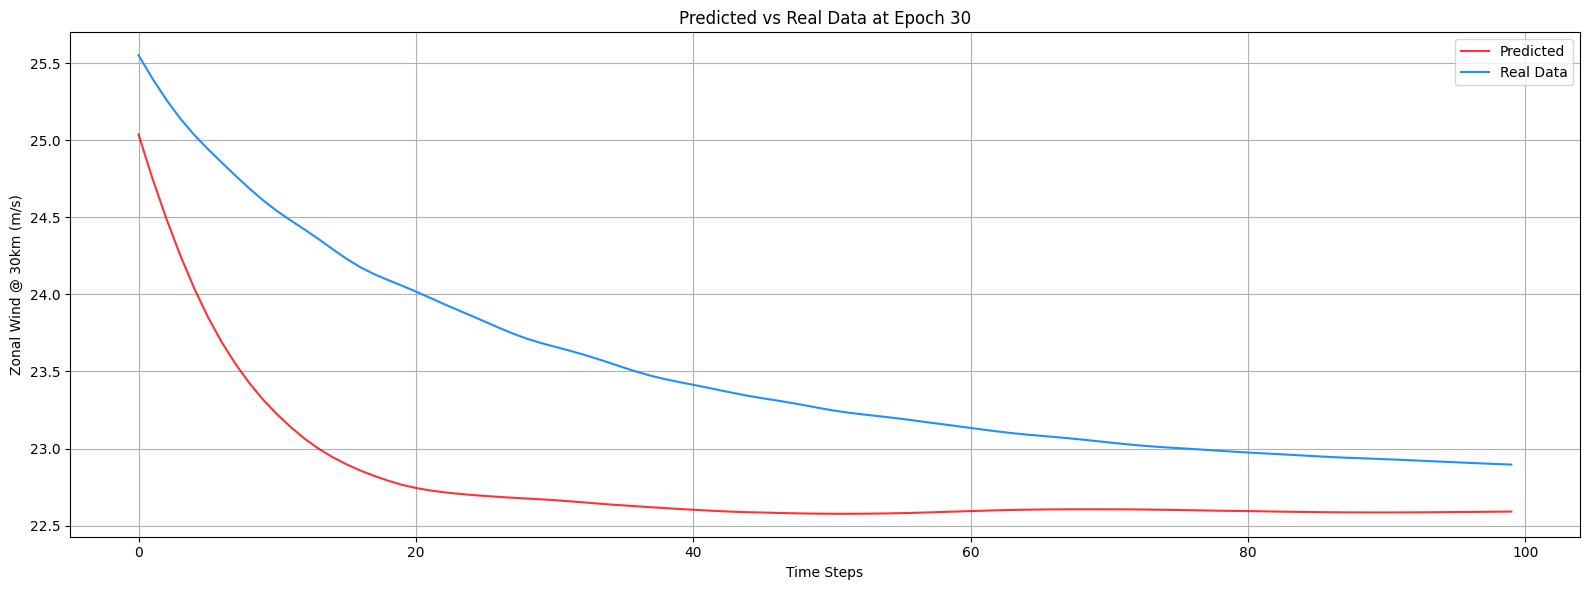

Epoch 32, 
        Reconstrunction Loss: 0.0010956708574667573

        Validation Reconstrunction Loss: 0.48397356271743774
Epoch 33, 
        Reconstrunction Loss: 0.001120744040235877

        Validation Reconstrunction Loss: 0.2346382886171341
Epoch 34, 
        Reconstrunction Loss: 0.001109990873374045

        Validation Reconstrunction Loss: 0.4734324514865875
Epoch 35, 
        Reconstrunction Loss: 0.0011545091401785612

        Validation Reconstrunction Loss: 0.3523906469345093
Epoch 36, 
        Reconstrunction Loss: 0.0011282091727480292

        Validation Reconstrunction Loss: 0.34221094846725464
Epoch 37, 
        Reconstrunction Loss: 0.0011394426692277193

        Validation Reconstrunction Loss: 0.2993497848510742
Epoch 38, 
        Reconstrunction Loss: 0.00112474977504462

        Validation Reconstrunction Loss: 0.4576583206653595
Epoch 39, 
        Reconstrunction Loss: 0.0011303352657705545

        Validation Reconstrunction Loss: 0.38226234912872314
Epoch 40,

Mini Inference at Epoch 40: 100%|██████████| 100/100 [00:00<00:00, 1379.69it/s]


<Figure size 640x480 with 0 Axes>

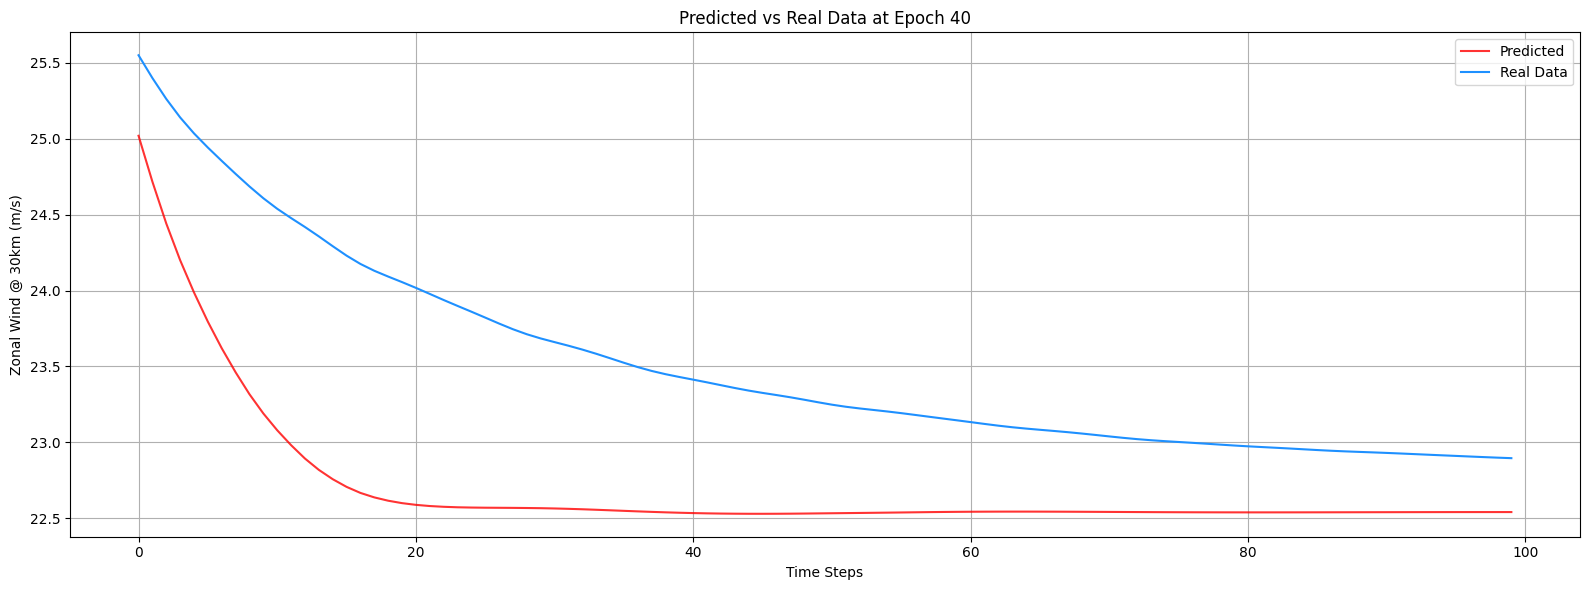

Epoch 42, 
        Reconstrunction Loss: 0.0011059241369366646

        Validation Reconstrunction Loss: 0.30738070607185364
Epoch 43, 
        Reconstrunction Loss: 0.001143189030699432

        Validation Reconstrunction Loss: 0.443065345287323
Epoch 44, 
        Reconstrunction Loss: 0.0011286459630355239

        Validation Reconstrunction Loss: 0.35203513503074646
Epoch 45, 
        Reconstrunction Loss: 0.0011027045547962189

        Validation Reconstrunction Loss: 0.49572107195854187
Epoch 46, 
        Reconstrunction Loss: 0.0011276653967797756

        Validation Reconstrunction Loss: 0.46458664536476135
Epoch 47, 
        Reconstrunction Loss: 0.0010777820134535432

        Validation Reconstrunction Loss: 0.33679017424583435
Epoch 48, 
        Reconstrunction Loss: 0.001119702821597457

        Validation Reconstrunction Loss: 0.5604684352874756
Epoch 49, 
        Reconstrunction Loss: 0.0011285175569355488

        Validation Reconstrunction Loss: 0.44919776916503906
Epoch

Mini Inference at Epoch 50: 100%|██████████| 100/100 [00:00<00:00, 1294.78it/s]


<Figure size 640x480 with 0 Axes>

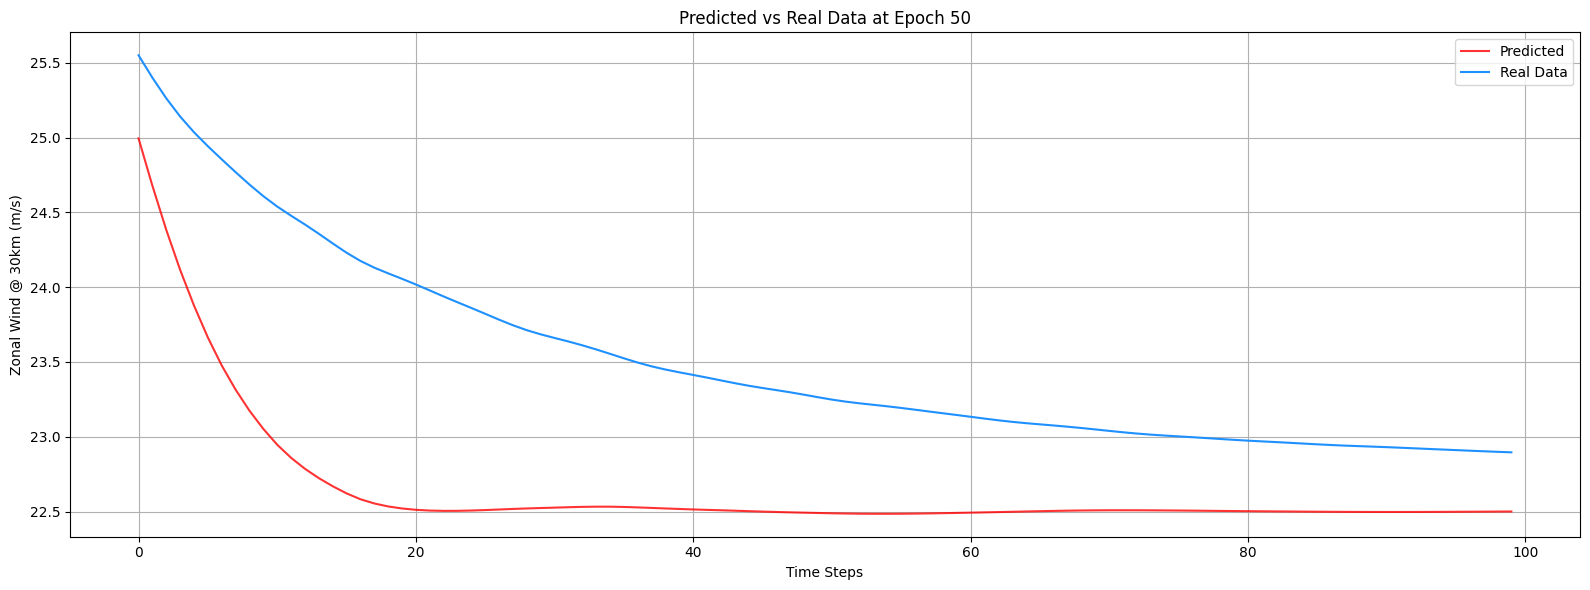

Epoch 52, 
        Reconstrunction Loss: 0.0011018445948138833

        Validation Reconstrunction Loss: 0.5686421394348145
Epoch 53, 
        Reconstrunction Loss: 0.0011480087414383888

        Validation Reconstrunction Loss: 0.46451544761657715
Epoch 54, 
        Reconstrunction Loss: 0.0010999871883541346

        Validation Reconstrunction Loss: 0.37664973735809326
Epoch 55, 
        Reconstrunction Loss: 0.00113247474655509

        Validation Reconstrunction Loss: 0.4383977949619293
Epoch 56, 
        Reconstrunction Loss: 0.0010924130911007524

        Validation Reconstrunction Loss: 0.4840482473373413
Epoch 57, 
        Reconstrunction Loss: 0.001151743228547275

        Validation Reconstrunction Loss: 0.5542917847633362
Epoch 58, 
        Reconstrunction Loss: 0.0011600319994613528

        Validation Reconstrunction Loss: 0.5230834484100342
Epoch 59, 
        Reconstrunction Loss: 0.0011244937777519226

        Validation Reconstrunction Loss: 0.5222958326339722
Epoch 60,

Mini Inference at Epoch 60: 100%|██████████| 100/100 [00:00<00:00, 1337.23it/s]


<Figure size 640x480 with 0 Axes>

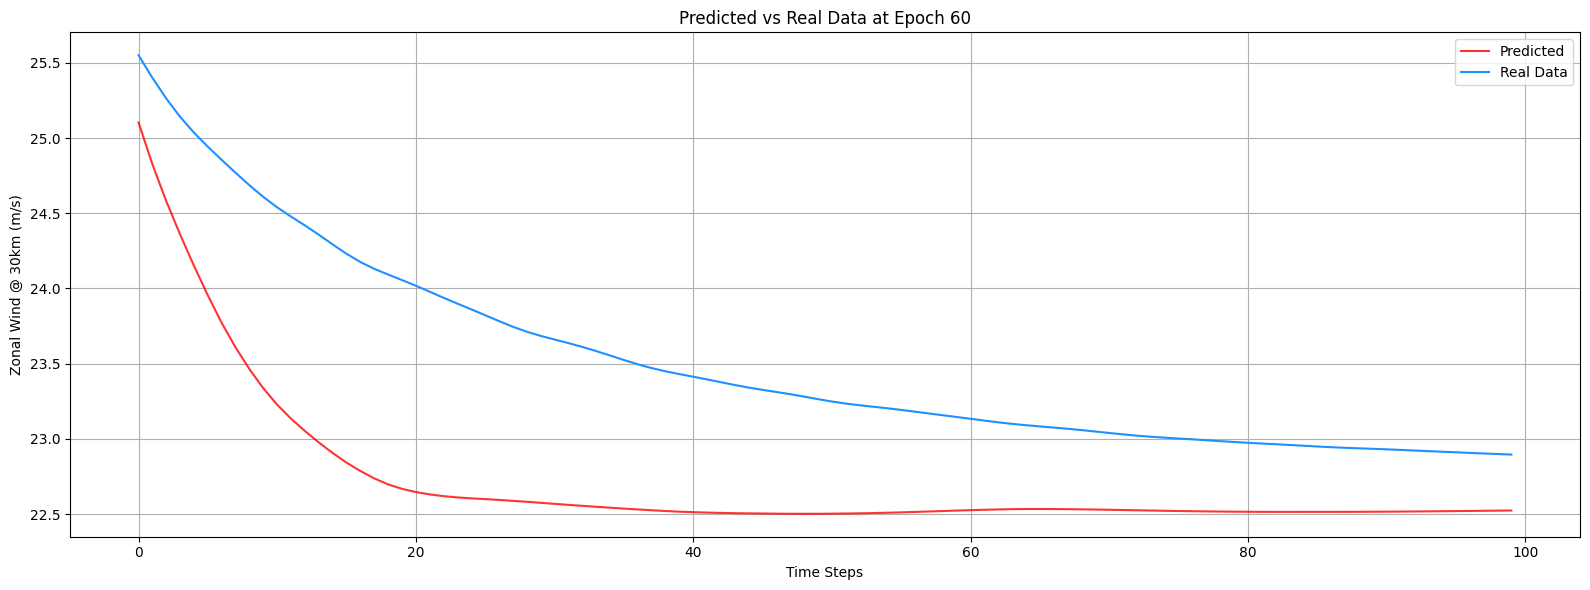

Epoch 62, 
        Reconstrunction Loss: 0.0011047105072066188

        Validation Reconstrunction Loss: 0.35984745621681213
Epoch 63, 
        Reconstrunction Loss: 0.0011095727095380425

        Validation Reconstrunction Loss: 0.5322476029396057
Epoch 64, 
        Reconstrunction Loss: 0.0011628157226368785

        Validation Reconstrunction Loss: 0.5068264603614807
Epoch 65, 
        Reconstrunction Loss: 0.0011175723047927022

        Validation Reconstrunction Loss: 0.5571128129959106
Epoch 66, 
        Reconstrunction Loss: 0.0011202676687389612

        Validation Reconstrunction Loss: 0.49617326259613037
Epoch 67, 
        Reconstrunction Loss: 0.0011271266266703606

        Validation Reconstrunction Loss: 0.40393730998039246
Epoch 68, 
        Reconstrunction Loss: 0.001128760864958167

        Validation Reconstrunction Loss: 0.6328933835029602
Epoch 69, 
        Reconstrunction Loss: 0.001106187584809959

        Validation Reconstrunction Loss: 0.5780369639396667
Epoch 7

Mini Inference at Epoch 70: 100%|██████████| 100/100 [00:00<00:00, 1139.43it/s]


<Figure size 640x480 with 0 Axes>

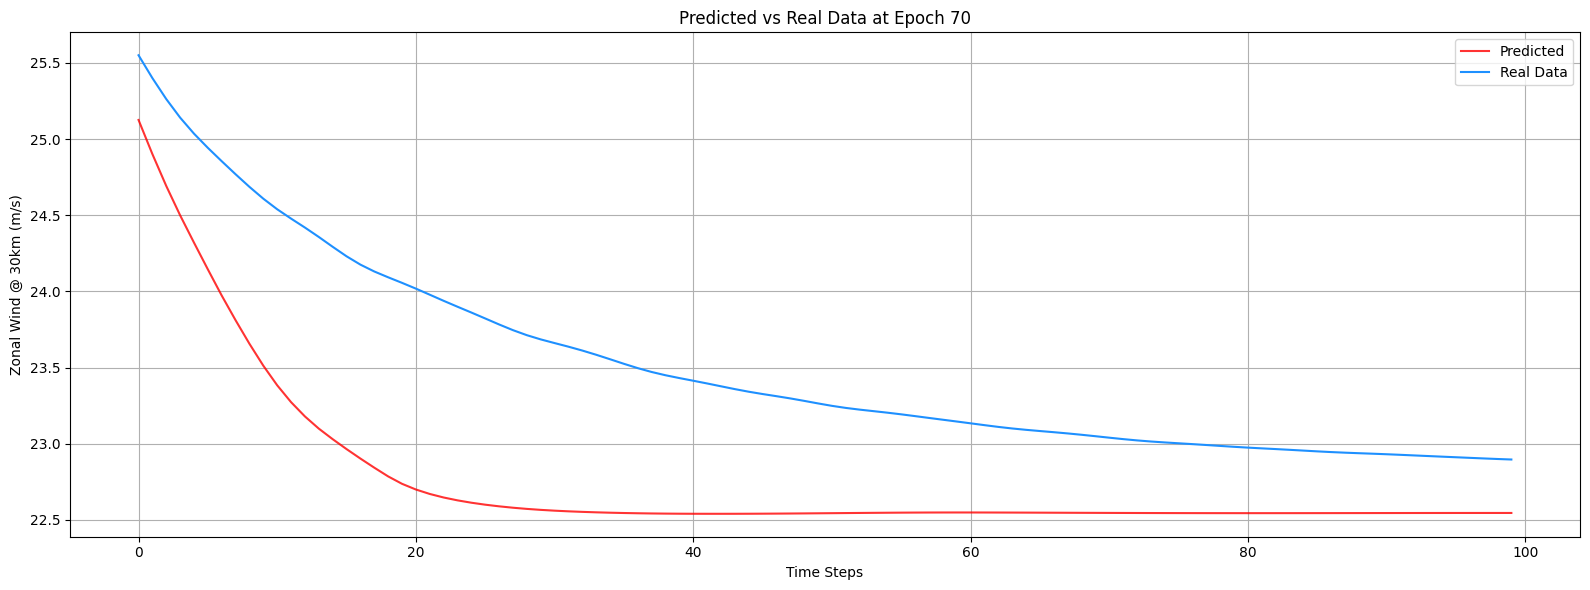

Epoch 72, 
        Reconstrunction Loss: 0.001141078071668744

        Validation Reconstrunction Loss: 0.4677724540233612
Epoch 73, 
        Reconstrunction Loss: 0.0010870989644899964

        Validation Reconstrunction Loss: 0.5265076756477356
Epoch 74, 
        Reconstrunction Loss: 0.001133569166995585

        Validation Reconstrunction Loss: 0.3900219202041626
Epoch 75, 
        Reconstrunction Loss: 0.001099497894756496

        Validation Reconstrunction Loss: 0.49558785557746887
Epoch 76, 
        Reconstrunction Loss: 0.0011271474650129676

        Validation Reconstrunction Loss: 0.5265914797782898
Epoch 77, 
        Reconstrunction Loss: 0.0010831771651282907

        Validation Reconstrunction Loss: 0.5220856070518494
Epoch 78, 
        Reconstrunction Loss: 0.0011683569755405188

        Validation Reconstrunction Loss: 0.4584384262561798
Epoch 79, 
        Reconstrunction Loss: 0.001138685503974557

        Validation Reconstrunction Loss: 0.5058428645133972
Epoch 80, 


Mini Inference at Epoch 80: 100%|██████████| 100/100 [00:00<00:00, 1318.80it/s]


<Figure size 640x480 with 0 Axes>

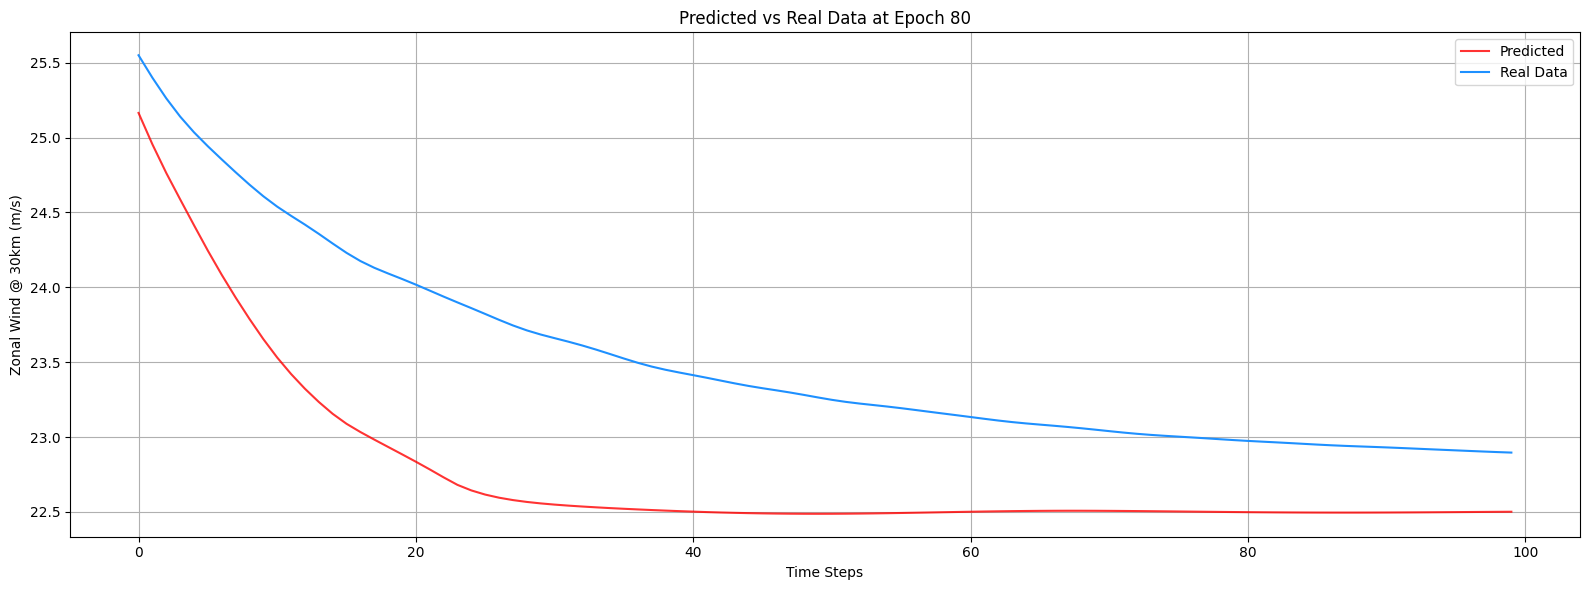

Epoch 82, 
        Reconstrunction Loss: 0.0011012011673301458

        Validation Reconstrunction Loss: 0.4906497597694397
Epoch 83, 
        Reconstrunction Loss: 0.0011155473766848445

        Validation Reconstrunction Loss: 0.5585496425628662
Epoch 84, 
        Reconstrunction Loss: 0.0011067020241171122

        Validation Reconstrunction Loss: 0.5426605343818665
Epoch 85, 
        Reconstrunction Loss: 0.0011170919751748443

        Validation Reconstrunction Loss: 0.4710242450237274
Epoch 86, 
        Reconstrunction Loss: 0.0010856734588742256

        Validation Reconstrunction Loss: 0.6170307397842407
Epoch 87, 
        Reconstrunction Loss: 0.0011229204246774316

        Validation Reconstrunction Loss: 0.3595871925354004
Epoch 88, 
        Reconstrunction Loss: 0.0011244290508329868

        Validation Reconstrunction Loss: 0.6414992809295654
Epoch 89, 
        Reconstrunction Loss: 0.0010933406883850694

        Validation Reconstrunction Loss: 0.5178616046905518
Epoch 90

Mini Inference at Epoch 90: 100%|██████████| 100/100 [00:00<00:00, 1356.79it/s]


<Figure size 640x480 with 0 Axes>

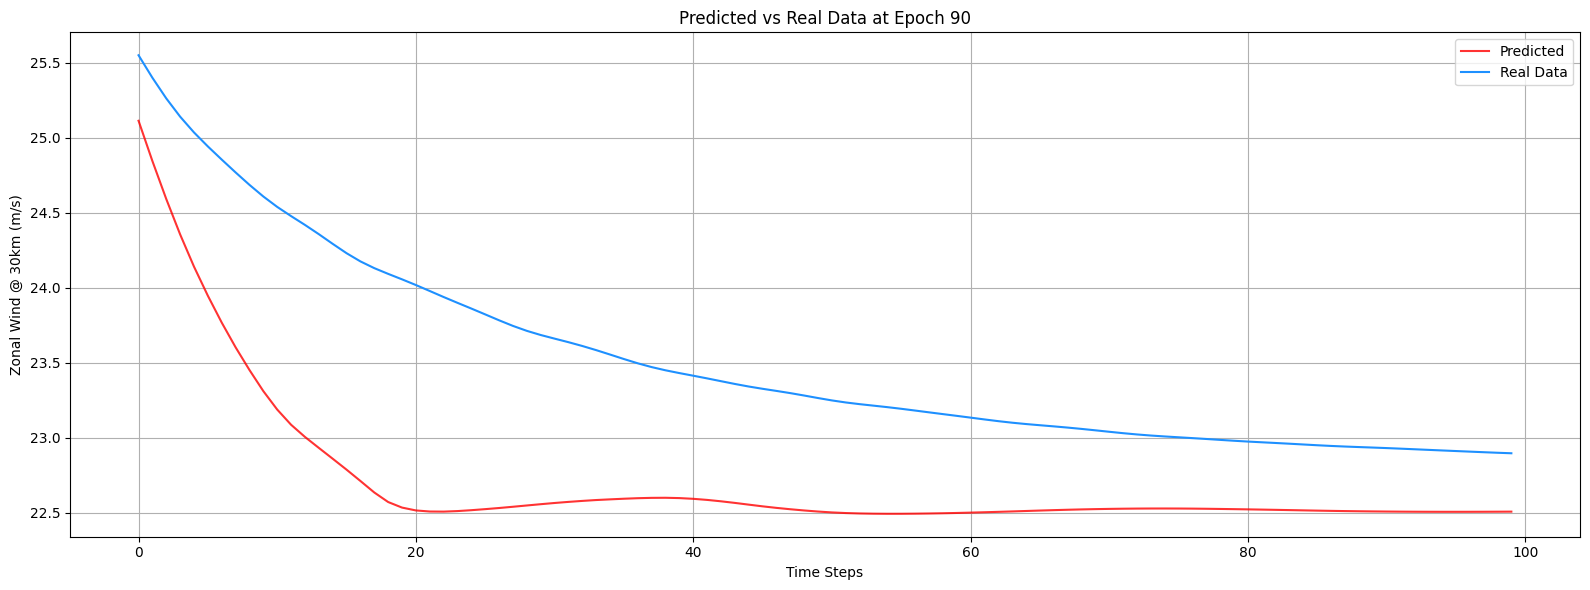

Epoch 92, 
        Reconstrunction Loss: 0.0011162101291120052

        Validation Reconstrunction Loss: 0.6449568271636963
Epoch 93, 
        Reconstrunction Loss: 0.0011324489023536444

        Validation Reconstrunction Loss: 0.4338788390159607
Epoch 94, 
        Reconstrunction Loss: 0.001117209205403924

        Validation Reconstrunction Loss: 0.7519491910934448
Epoch 95, 
        Reconstrunction Loss: 0.0011226293863728642

        Validation Reconstrunction Loss: 0.4887230396270752
Epoch 96, 
        Reconstrunction Loss: 0.0010924728121608496

        Validation Reconstrunction Loss: 0.48135364055633545
Epoch 97, 
        Reconstrunction Loss: 0.0011196384439244866

        Validation Reconstrunction Loss: 0.4699229896068573
Epoch 98, 
        Reconstrunction Loss: 0.0010786959901452065

        Validation Reconstrunction Loss: 0.48380982875823975
Epoch 99, 
        Reconstrunction Loss: 0.0011191921075806022

        Validation Reconstrunction Loss: 0.883560836315155
Epoch 10

Mini Inference at Epoch 100: 100%|██████████| 100/100 [00:00<00:00, 1333.63it/s]


<Figure size 640x480 with 0 Axes>

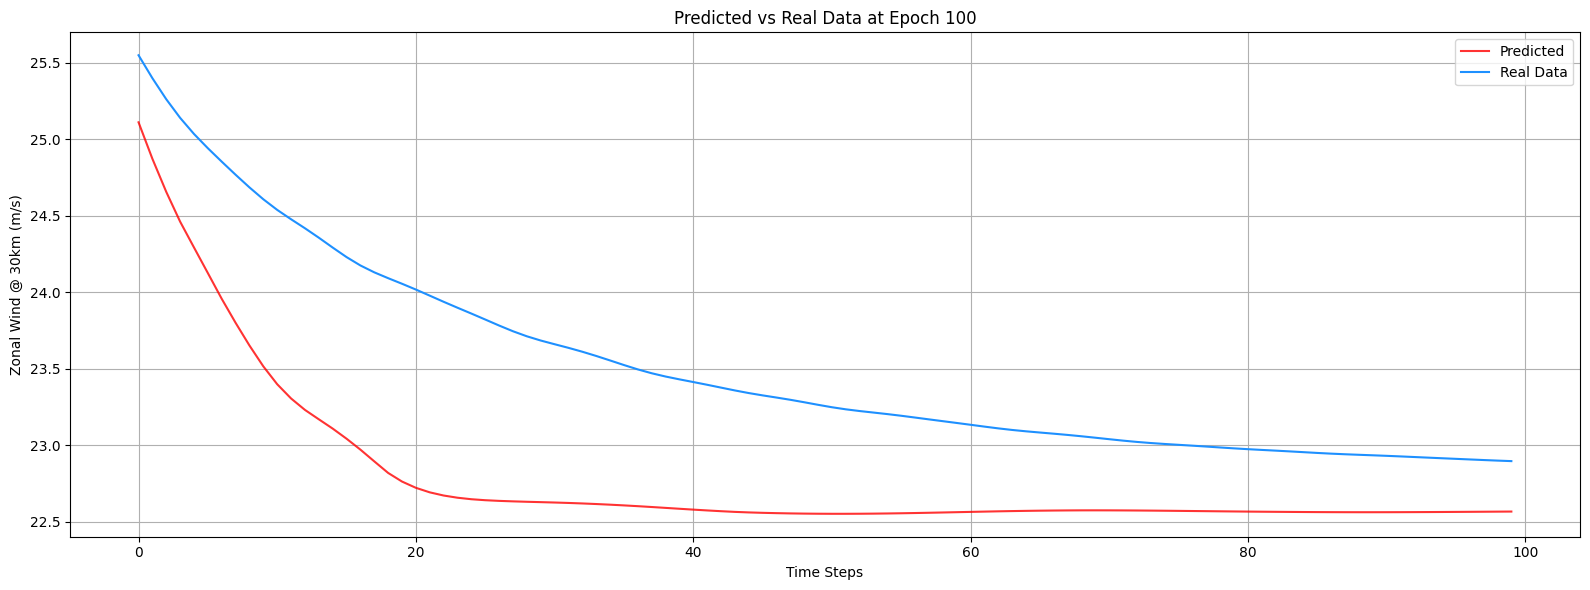

Epoch 102, 
        Reconstrunction Loss: 0.0011069867759943008

        Validation Reconstrunction Loss: 0.637577474117279
Epoch 103, 
        Reconstrunction Loss: 0.0011184215545654297

        Validation Reconstrunction Loss: 0.4509783387184143
Epoch 104, 
        Reconstrunction Loss: 0.001110154204070568

        Validation Reconstrunction Loss: 0.4677424728870392
Epoch 105, 
        Reconstrunction Loss: 0.0011220326414331794

        Validation Reconstrunction Loss: 0.5532863140106201
Epoch 106, 
        Reconstrunction Loss: 0.0011200237786397338

        Validation Reconstrunction Loss: 0.48741722106933594
Epoch 107, 
        Reconstrunction Loss: 0.0011256418656557798

        Validation Reconstrunction Loss: 0.641828179359436
Epoch 108, 
        Reconstrunction Loss: 0.001109923468902707

        Validation Reconstrunction Loss: 0.669947624206543
Epoch 109, 
        Reconstrunction Loss: 0.00111801503226161

        Validation Reconstrunction Loss: 0.49541836977005005
Epoch

Mini Inference at Epoch 110: 100%|██████████| 100/100 [00:00<00:00, 1325.26it/s]


<Figure size 640x480 with 0 Axes>

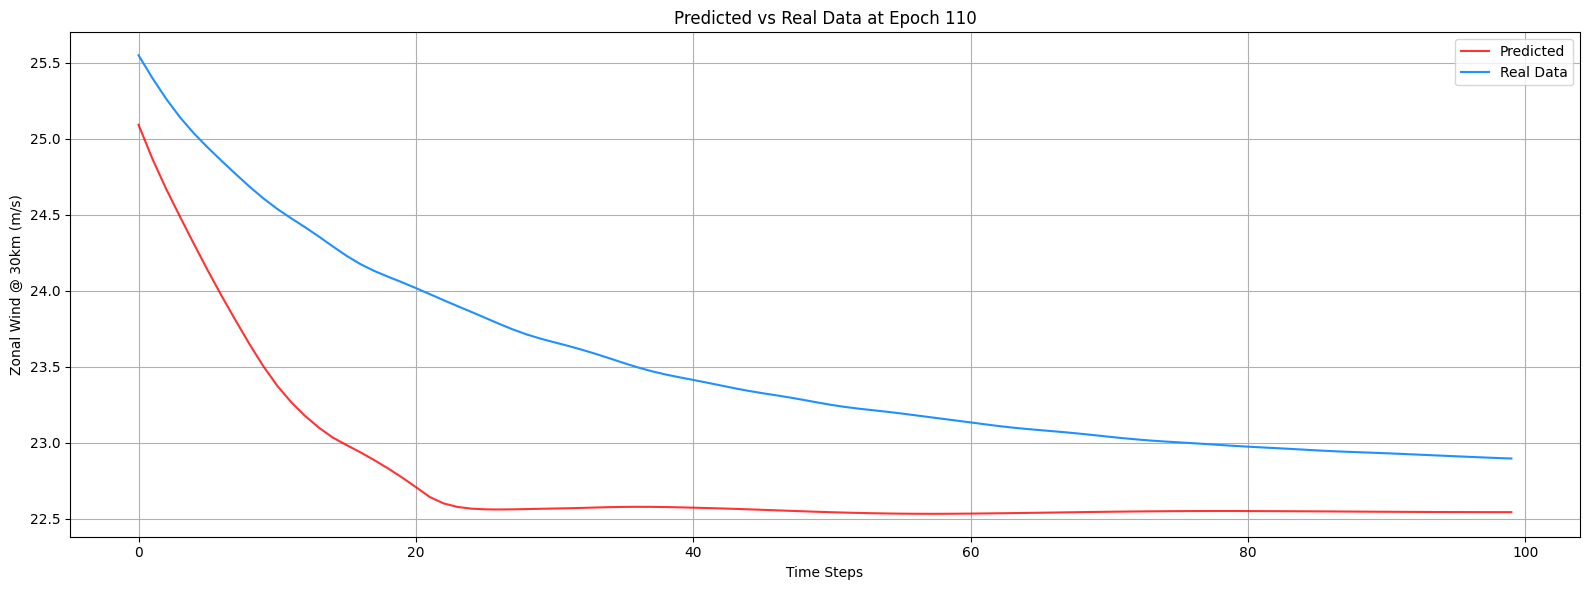

Epoch 112, 
        Reconstrunction Loss: 0.0010953487362712622

        Validation Reconstrunction Loss: 0.332297146320343
Epoch 113, 
        Reconstrunction Loss: 0.0011321179335936904

        Validation Reconstrunction Loss: 0.7396727800369263
Epoch 114, 
        Reconstrunction Loss: 0.0011287027737125754

        Validation Reconstrunction Loss: 0.36285749077796936
Epoch 115, 
        Reconstrunction Loss: 0.0011243725894019008

        Validation Reconstrunction Loss: 0.4452313780784607
Epoch 116, 
        Reconstrunction Loss: 0.001119903288781643

        Validation Reconstrunction Loss: 0.5172672271728516
Epoch 117, 
        Reconstrunction Loss: 0.0010899108601734042

        Validation Reconstrunction Loss: 0.4128067195415497
Epoch 118, 
        Reconstrunction Loss: 0.0011198660358786583

        Validation Reconstrunction Loss: 0.5261294841766357
Epoch 119, 
        Reconstrunction Loss: 0.0011341505451127887

        Validation Reconstrunction Loss: 0.551971435546875
Ep

Mini Inference at Epoch 120: 100%|██████████| 100/100 [00:00<00:00, 1389.05it/s]


<Figure size 640x480 with 0 Axes>

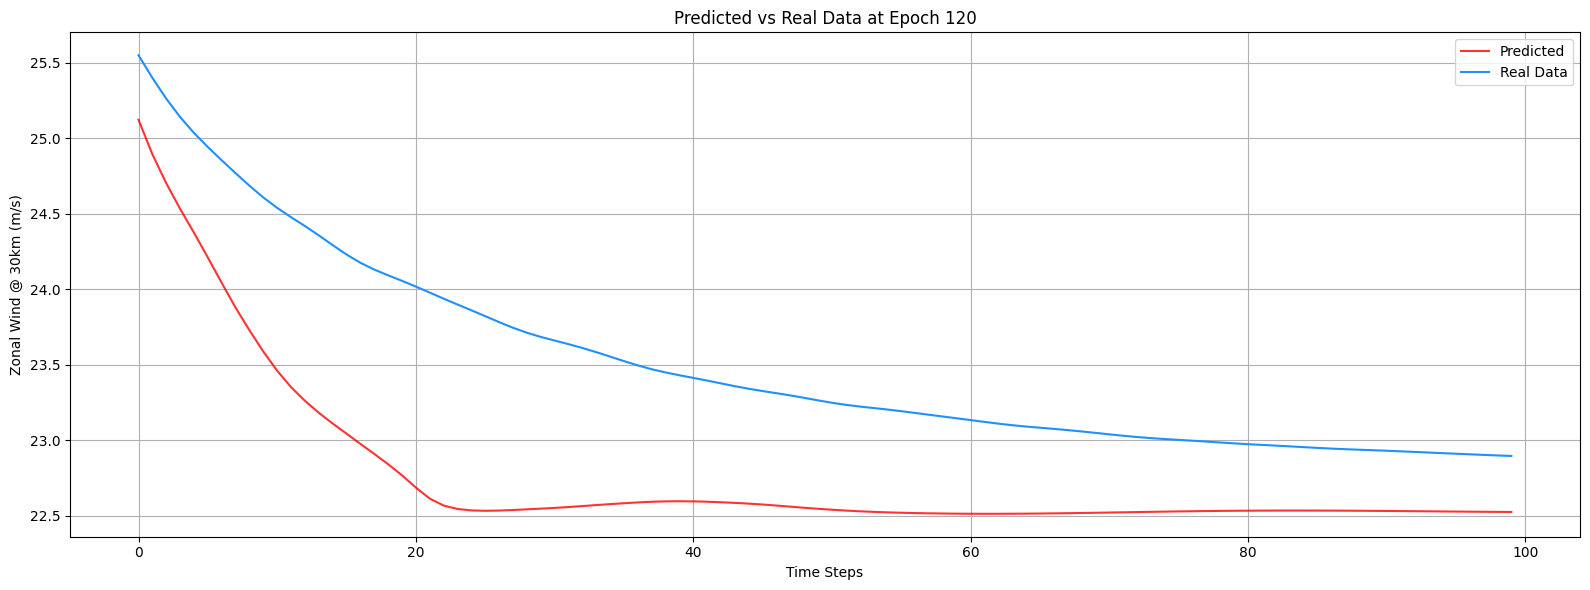

Epoch 122, 
        Reconstrunction Loss: 0.0011124652810394764

        Validation Reconstrunction Loss: 0.3627236485481262
Epoch 123, 
        Reconstrunction Loss: 0.0010911653516814113

        Validation Reconstrunction Loss: 0.6362593770027161
Epoch 124, 
        Reconstrunction Loss: 0.001131584052927792

        Validation Reconstrunction Loss: 0.5100269317626953
Epoch 125, 
        Reconstrunction Loss: 0.0011097624665126204

        Validation Reconstrunction Loss: 0.5605583786964417
Epoch 126, 
        Reconstrunction Loss: 0.0011120723793283105

        Validation Reconstrunction Loss: 0.6359410285949707
Epoch 127, 
        Reconstrunction Loss: 0.0010961330262944102

        Validation Reconstrunction Loss: 0.5988330841064453
Epoch 128, 
        Reconstrunction Loss: 0.0011274295393377542

        Validation Reconstrunction Loss: 0.5327361226081848
Epoch 129, 
        Reconstrunction Loss: 0.0010931568685919046

        Validation Reconstrunction Loss: 0.5356037020683289
E

Mini Inference at Epoch 130: 100%|██████████| 100/100 [00:00<00:00, 1294.02it/s]


<Figure size 640x480 with 0 Axes>

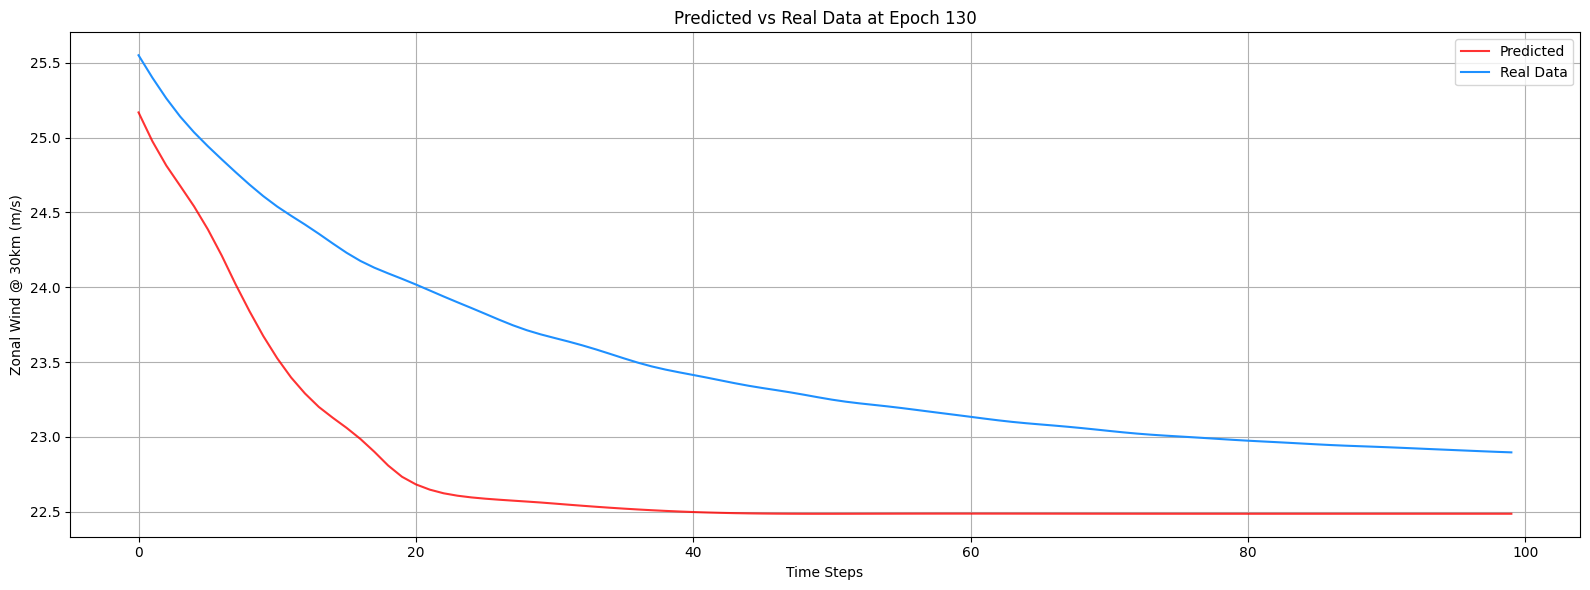

Epoch 132, 
        Reconstrunction Loss: 0.001146251568570733

        Validation Reconstrunction Loss: 0.5545561909675598
Epoch 133, 
        Reconstrunction Loss: 0.0010795679409056902

        Validation Reconstrunction Loss: 0.48227250576019287
Epoch 134, 
        Reconstrunction Loss: 0.0011214835103601217

        Validation Reconstrunction Loss: 0.482698917388916
Epoch 135, 
        Reconstrunction Loss: 0.0011107749305665493

        Validation Reconstrunction Loss: 0.5214528441429138
Epoch 136, 
        Reconstrunction Loss: 0.0011086694430559874

        Validation Reconstrunction Loss: 0.757942795753479
Epoch 137, 
        Reconstrunction Loss: 0.001094140112400055

        Validation Reconstrunction Loss: 0.4728394150733948
Epoch 138, 
        Reconstrunction Loss: 0.0011543184518814087

        Validation Reconstrunction Loss: 0.6676338911056519
Epoch 139, 
        Reconstrunction Loss: 0.0011273757554590702

        Validation Reconstrunction Loss: 0.4734736680984497
Epo

Mini Inference at Epoch 140: 100%|██████████| 100/100 [00:00<00:00, 789.49it/s]


<Figure size 640x480 with 0 Axes>

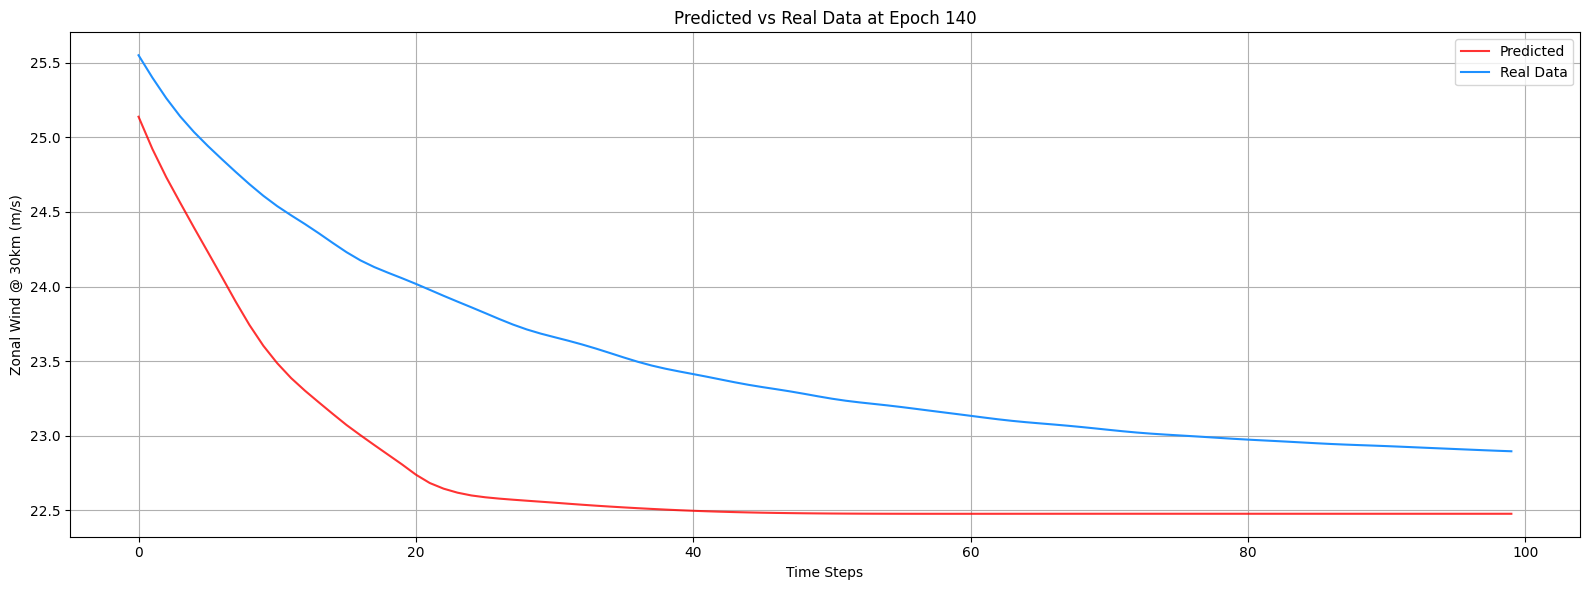

Epoch 142, 
        Reconstrunction Loss: 0.0011184627655893564

        Validation Reconstrunction Loss: 0.5435664057731628


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.stats import linregress
from tqdm import tqdm

def normalize_transition_time(slope_value, delta, transition_real):
    normalized = 1 - np.exp(-np.abs((slope_value - transition_real)) / delta)
    return normalized

def total_variation_distance(p, q):
    p = np.array(p)
    q = np.array(q)
    return 0.5 * np.sum(np.abs(p - q))

def calculate_transition_durations(y_values, upper_bound, lower_bound):
    times_between_transitions = []
    transition_start = None
    above_upper = False
    below_lower = False
    for i in range(1, len(y_values)):
        if y_values[i] < lower_bound:
            below_lower = True
            above_upper = False
        elif y_values[i] > upper_bound:
            if below_lower and transition_start is not None:
                times_between_transitions.append(i - transition_start)
                transition_start = None
            above_upper = True
            below_lower = False
        if below_lower and transition_start is None:
            transition_start = i
    return times_between_transitions


upper_bound = 53.8 / 2.8935
lower_bound = 7.41
level = 63
real_data = np.load(r'/home/fabio/work/HM_and_AI_models/VAE_Model/data/time_series_deterministic.npy')

real_data_1d = real_data[:, level]
real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)
real_data_sorted = np.sort(real_durations)
transition_real = np.mean(real_data_sorted)
actual_hist, bin_edges = np.histogram(real_data[:, level], bins=50, density=True)
print(f"Reference Real Data average_transition_time: {transition_real}")

# Train the model
for epoch in range(num_epochs):
    z_train = torch.zeros([batch_size,latent_dim])
    z_val = torch.zeros([batch_size,latent_dim])
    model.train()
    for batch in range (0, trainN, batch_size):
        input_batch = psi_train_input[batch:batch + batch_size,:]
        label_batch = psi_train_label[batch:batch + batch_size,:]

        optimizer.zero_grad()

        z_train = torch.randn_like(z_train)
        z_train = z_train[:input_batch.shape[0],:]

        output = model(z_train.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        #current loss
        loss = reconstruction_loss

        loss.backward()
        optimizer.step()

    print(f'''Epoch {epoch+1}, 
        Reconstrunction Loss: {loss.item()}''')

    # Validation Loss
    for batch in range (0, valN, batch_size):

        input_batch = psi_val_input[batch:batch + batch_size,:]
        label_batch = psi_val_label[batch:batch + batch_size,:]
        
        z_val = torch.randn_like(z_val)
        z_val = z_val[:input_batch.shape[0],:]

        output = model(z_val.float().cuda(), input_batch.float().cuda())

        # Reconstruction loss
        val_reconstruction_loss = F.huber_loss(output, label_batch.float().cuda(), reduction="mean", delta = 1)
        
        # Total loss
        val_loss = val_reconstruction_loss

    print(f'''
        Validation Reconstrunction Loss: {val_loss.item()}''')
      
    #Save and make an inference every 10 epochs of training
    if (epoch % 10 == 0):
        torch.save(model.state_dict(), f"{folder}/model_at_epoch{epoch}")
        model.eval()
        with torch.no_grad():
            initial_cond = torch.reshape(torch.tensor(psi[0,:]), [1, 75]).float().cuda()
            z = torch.zeros([1, latent_dim]).float().cuda()
            time_steps = 100 
            pred = np.zeros([time_steps, 75])

            for k in tqdm(range(0, time_steps), desc = f"Mini Inference at Epoch {epoch}"):
                    # z = torch.randn_like(z)
                    y = (model.decode(z.float().cuda(), initial_cond.float().cuda())).detach().cpu().numpy()
                    pred[k, :] = y
                    y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
                    initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])
        
        pred_mean = pred * std_psi + mean_psi
        plt.figure(figsize=(16, 6))
        plt.plot(pred_mean[:, level], label='Predicted', color='red', alpha=0.8)
        plt.plot(real_data[:time_steps, level], label='Real Data', color='dodgerblue')
        plt.title(f'Predicted vs Real Data at Epoch {epoch}')
        plt.xlabel('Time Steps')
        plt.ylabel('Zonal Wind @ 30km (m/s)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{folder}/epoch_{epoch}_pred_vs_real.png')

/tmp/ipykernel_1115/2790460516.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path))


Model weights loaded from /home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch140.


Inference: 100%|██████████| 999/999 [00:03<00:00, 277.86it/s]


11.517789226662394
11.517789226662394


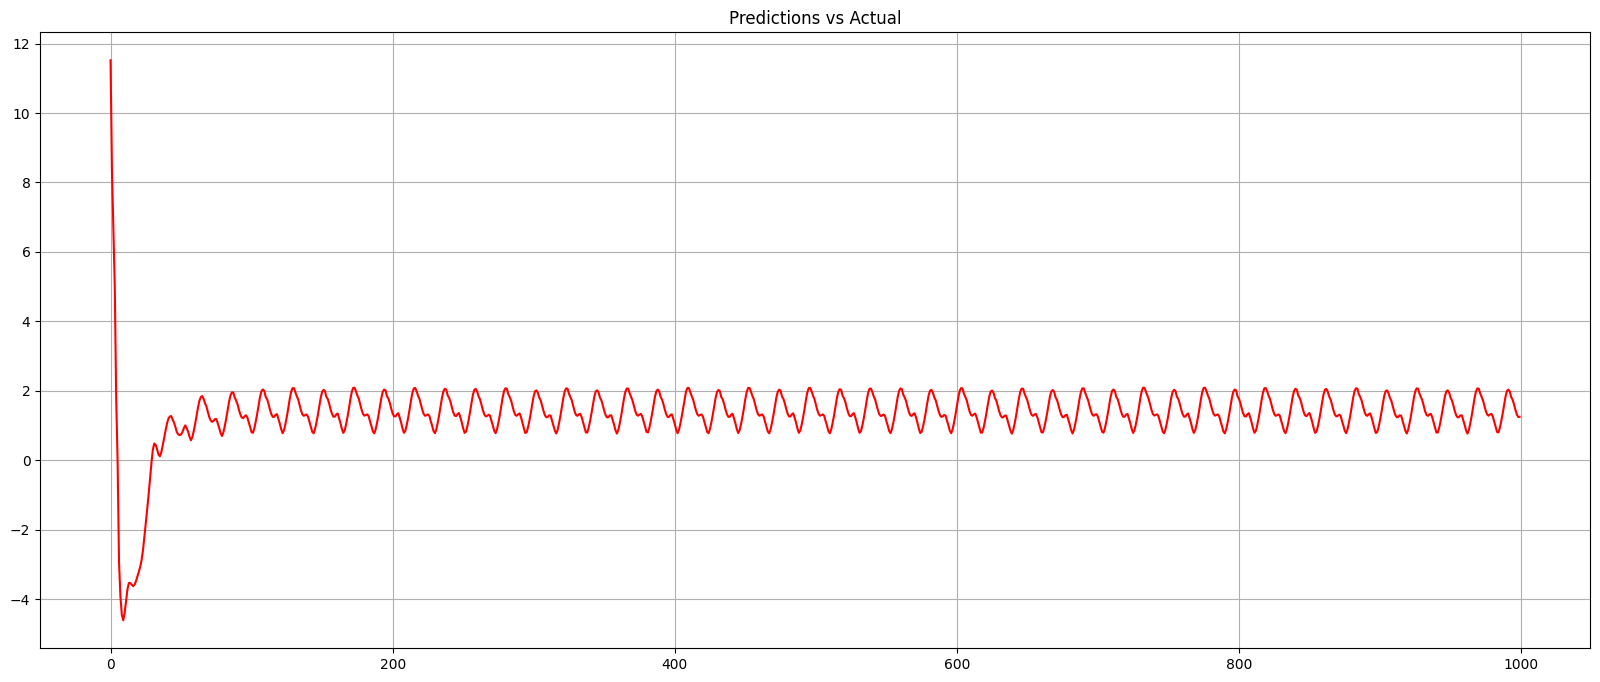

In [49]:


# MODIFY THIS LINE FOR MODEL TESTING
epoch = 140


model_weights_path = f'/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights_100/model_at_epoch{epoch}'


if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

for ens in range (0,1):
    initial_cond = torch.reshape(torch.tensor(normalized_psi[500_000, :]), [1, 75])
    time_step = 1000
    z = torch.zeros([1,latent_dim])
    num_ens = 1
    pred = np.zeros([time_step, 75, num_ens])
    pred[0, :] = initial_cond.T

    for k in tqdm(range (1, time_step), desc = "Inference"):
        # Small perturbations
        # z = torch.rand_like(z)
        y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()
        pred[k,:] = y.T
        y_denorm = (y * std_psi[:, :] + mean_psi[:, :])
        initial_cond = torch.tensor((y_denorm - mean_psi[:, :]) / std_psi[:, :])

    pred = pred.reshape(pred.shape[0], pred.shape[1])

    pred_mean = (pred * std_psi) + mean_psi
    actual_values = psi 

    plt.figure(figsize=(20,8))
    plt.plot(pred_mean[0:time_step, 63], color = 'red')
    plt.plot(actual_values[500_000:time_step, 63], color ='dodgerblue')
    print(actual_values[500_000, 63])
    print(pred_mean[0, 63])
    plt.grid(True)
    plt.title(f"Predictions vs Actual")
    plt.savefig(f'/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/inferences/pictures/epoch_{epoch}_{ens}.png')
    plt.show()

    np.save(f'/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/inferences/data/epoch_{epoch}_{ens}.npy', pred_mean)

/tmp/ipykernel_46201/1615594468.py:13: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_weights_path))


Model weights loaded from /home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/weights/model_at_epoch80.


Inference:   0%|          | 0/2 [00:00<?, ?it/s]

Inference: 100%|██████████| 2/2 [00:00<00:00, 289.95it/s]


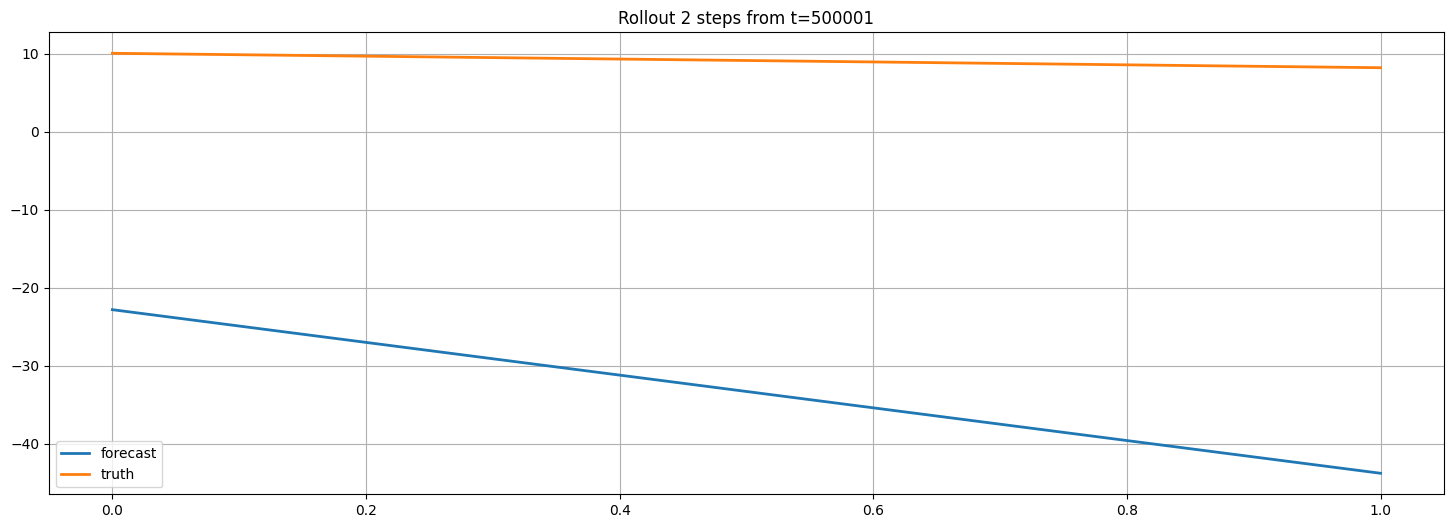

In [26]:
# ------------------------------------------------------------
# 1)  Choose the start index and verify you have enough data
# ------------------------------------------------------------
t0        = 500_001 # <-- starting time step
time_step = 2 # <-- forecast length
assert psi.shape[0] > t0 + time_step, "ψ is not long enough"

# ------------------------------------------------------------
# 2)  Load the model weights (unchanged)
# ------------------------------------------------------------

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")

# ------------------------------------------------------------
# 3)  Run the forecast
# ------------------------------------------------------------

for ens in range(1):                     # still one ensemble member
    # ---- (a) build the NORMALISED initial condition -----------------
    x0          = psi[t0, :]                           # raw state at t0
    initial_cond = torch.tensor(                      # shape (1,75)
        (x0 - mean_psi[0]) / std_psi[0]
    ).float().unsqueeze(0)

    # ---- (b) containers --------------------------------------------
    z    = torch.zeros((1, latent_dim))
    z = torch.randn_like(z)
    pred = np.zeros((time_step, 75))      # 2-D is simpler

    # ---- (c) autoregressive rollout --------------------------------
    for k in tqdm(range(time_step), desc="Inference"):
        y = (
            model.decode(z.cuda(), initial_cond.cuda())
            .detach()
            .cpu()
            .numpy()
        )                       # y shape (1,75)
        pred[k] = y             # fills (75,) into pred[k]

        # denorm->renorm so the next step uses y as state
        y_denorm     = y * std_psi + mean_psi
        initial_cond = torch.tensor((y_denorm - mean_psi) / std_psi).float()

    # ------------------------------------------------------------
    # 4)  Denormalise the whole forecast and the matching truth
    # ------------------------------------------------------------
    pred_denorm   = pred * std_psi + mean_psi
    truth_window  = psi[t0 : t0 + time_step] * std_psi + mean_psi

    # ------------------------------------------------------------
    # 5)  Quick visual check and save
    # ------------------------------------------------------------
    plt.figure(figsize=(18,6))
    plt.plot(pred_denorm[:, 63],   label="forecast", linewidth=2)
    plt.plot(truth_window[:, 63],  label="truth",    linewidth=2)
    plt.title(f"Rollout {time_step} steps from t={t0}")
    plt.grid(True);  plt.legend()
    out_dir = "/home/fabio/work/HM_and_AI_models/VAE_Model/Push/Archictures/inferences"
    plt.savefig(f"{out_dir}/pictures/epoch_{epoch}_{ens}.png")
    plt.show()

    np.save(f"{out_dir}/data/epoch_{epoch}_{ens}.npy", pred_denorm)


# Testing

In [ ]:
#FLAGS to determine testing
plot_data = 1
#what level do you want to plot
level = 63
CCDF = 1
Bi_modal_distribution = 1
single_step_profiles = 1
#for the single_step_profiles
NUM_SAMPLES = 5
#what weights do you want to use?

MODEL_PATH = r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_KL_TEST_at_2025-06-03 10:39:03.562572/model_at_2_with_kl_10/checkpoint_2"
LEVEL = 63

import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

# Load the data; shape = (300000, 2, 75)
real_data = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/data/actual/long_run_310k.npy")
predictions = np.load(r"/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/predictions_best_checkpoint_and_cycle_Resnet_VAE_1.npy")

#reshape the predictions so that it matches the real_data shape
print(predictions.shape)
print(real_data.shape)
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S.%f")
folder = f"testing_at_{timestamp}"
os.mkdir(folder)
subfolders = ['timeseries', 'CCDF', 'bi_modal_distribution', 'single_step_profiles']
# Create each subdirectory inside the main folder
for subfolder in subfolders:
    path = os.path.join(folder, subfolder)
    os.mkdir(path)
    print(f"Created subfolder: {path}")
SAVE_DIR = os.path.join(folder, "single_step_profiles")
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import random

model = ConditionalVAE(latent_dim, output_dim, condition_dim)
model = model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# MODIFY THIS LINE FOR MODEL TESTING
model_weights_path = "/home/constantino-daniel-boscu/Documents/research/AI-RES/modified-code-main3/training_cycles/resnet/Resnet_VAE_model_lat1024_at_2025-04-11 12:46:39.526973/model_at_0/checkpoint_3"

if os.path.exists(model_weights_path):
    model.load_state_dict(torch.load(model_weights_path))
    print(f"Model weights loaded from {model_weights_path}.")
    
if (plot_data):
    #note that the value 300000 will have to change depending on the real and predictions data length
    u_profile_real = real_data[:300000, 1, level]  # Match time length with predictions
    u_profile_pred = predictions[:, level]
    time_steps = np.arange(len(u_profile_pred))

    # === Plot ===
    plt.figure(figsize=(14, 6))

    plt.plot(time_steps, u_profile_real, label='Real Data', alpha=0.7)
    plt.plot(time_steps, u_profile_pred, label='Predictions', linestyle='--')


    # Labels, legend, and formatting
    plt.xlabel('Time step')
    plt.ylabel('U (m/s)')
    plt.title(f'Time Series of U at Vertical Level {level}')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "timeseries")
    save_path = os.path.join(save_path, "real_prediction_plot")
    plt.savefig(save_path)
    plt.show()

if (CCDF):
    real_data_1d = real_data[:, 1, 63]  # Now shape is (309700,)
    predictions_1d = predictions[:, 63]  # shape (300000,)

    # Define bounds (assuming they apply to both datasets)
    upper_bound = 53.8 / 2.8935
    lower_bound = 1.75 / 2.8935

    # Function to calculate transition durations
    def calculate_transition_durations(y_values, upper_bound, lower_bound):
        times_between_transitions = []
        transition_start = None
        above_upper = False
        below_lower = False

        for i in range(1, len(y_values)):
            if y_values[i] < lower_bound:  
                below_lower = True
                above_upper = False
            elif y_values[i] > upper_bound:  
                if below_lower and transition_start is not None:
                    times_between_transitions.append(i - transition_start)
                    transition_start = None  
                above_upper = True
                below_lower = False

            if below_lower and transition_start is None:
                transition_start = i

        return times_between_transitions

    # Compute transition durations for real data
    real_durations = calculate_transition_durations(real_data_1d, upper_bound, lower_bound)

    # Compute transition durations for predictions data
    pred_durations = calculate_transition_durations(predictions_1d, upper_bound, lower_bound)

    # Plot setup
    plt.figure(figsize=(10, 6))

    # === REAL DATA CCDF AND FIT ===
    if len(real_durations) == 0:
        print("No transitions detected in real data with current bounds!")
    else:
        real_data_sorted = np.sort(real_durations)
        x_line_real = np.linspace(min(real_data_sorted), max(real_data_sorted), 100)
        exponential_fit_real = 1/np.mean(real_data_sorted)
        y_values_real = exponential_fit_real*x_line_real
        plt.plot(x_line_real, y_values_real, 'b-', label=f'Real Exp Fit (slope={exponential_fit_real:.4f})', linewidth=2)

    # === PREDICTIONS CCDF AND FIT ===
    if len(pred_durations) == 0:
        print("No transitions detected in predictions with current bounds!")
    else:
        pred_data_sorted = np.sort(pred_durations)
        x_line_pred = np.linspace(min(pred_data_sorted), max(pred_data_sorted), 100)
        exponential_fit_pred = 1/np.mean(pred_data_sorted)
        y_values_pred = exponential_fit_pred*x_line_pred
        plt.plot(x_line_pred, y_values_pred, 'r-', label=f'Pred Exp Fit (slope={exponential_fit_pred:.4f})', linewidth=2)

    print(1/np.mean(real_data_sorted))
    print(1/np.mean(pred_data_sorted))
    # Plot labels and formatting
    plt.xlabel('Time Duration (Steps)')
    plt.ylabel('CCDF')
    plt.title('CCDF of Time Between B->A and A->B Transitions (Exponential Fit)')
    plt.yscale("linear")  # y-axis log scale
    plt.xscale("linear")  # x-axis linear scale
    plt.grid()
    plt.legend()
    plt.tight_layout()
    save_path = os.path.join(folder, "CCDF")
    save_path = os.path.join(save_path, "CCDF_plot")
    plt.savefig(save_path)
    plt.show()
if (Bi_modal_distribution):
    zonal_wind_data_real = real_data[:, 1, 63]  # variable index 1 (e.g., zonal wind), level 60
    zonal_wind_data_predictions = predictions[:, 63]  # variable index 0 (predictions), level 60

    print(f"Shape of zonal_wind_data_real: {zonal_wind_data_real.shape}")
    print(f"Shape of zonal_wind_data_predictions: {zonal_wind_data_predictions.shape}")

    # Plot the bimodal histogram
    plt.figure(figsize=(12, 6))

    # Create histograms (overlaid)
    sns.histplot(zonal_wind_data_real, bins=50, kde=True, color='black', alpha=0.6, element='step', label='Real Data')
    sns.histplot(zonal_wind_data_predictions, bins=50, kde=True, color='red', alpha=0.6, element='step', label='Predictions')

    # Customize plot labels and title
    plt.title('Distribution of Zonal Winds For Real Data and Predictions', fontsize=16)
    plt.xlabel('Zonal Wind (m/s)', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add vertical lines at means
    plt.axvline(np.mean(zonal_wind_data_real), color='black', linestyle='--', label=f'Real Mean: {np.mean(zonal_wind_data_real):.2f}')
    plt.axvline(np.mean(zonal_wind_data_predictions), color='red', linestyle='--', label=f'Pred Mean: {np.mean(zonal_wind_data_predictions):.2f}')

    # Final plot settings
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    save_path = os.path.join(folder, "bi_modal_distribution")
    save_path = os.path.join(save_path, "bi_modal_distribution_plot")
    plt.savefig(save_path)
    plt.show()
if (single_step_profiles):
    # Ensure save directory exists
    os.makedirs(SAVE_DIR, exist_ok=True)

    # === Load model weights ===
    model.load_state_dict(torch.load(MODEL_PATH))
    model.eval()

    # === Randomly sample time points from real data ===
    time_indices = random.sample(range(0, real_data.shape[0] - 2), NUM_SAMPLES)
    print(f"Randomly sampled time steps: {time_indices}")

    # === Time series visualization ===
    real_data_timeseries = real_data[:, 1, LEVEL]
    time_steps_all = np.arange(len(real_data_timeseries))

    plt.figure(figsize=(12, 6))
    plt.plot(time_steps_all, real_data_timeseries, label="Real Data at Level 61", color='blue')

    # Mark sample points
    for idx_num, idx in enumerate(time_indices):
        plt.axvline(x=idx, color='green', linestyle='--', linewidth=2)
    if len(time_indices) > 0:
        plt.axvline(x=time_indices[0], color='green', linestyle='--', linewidth=2, label='Sampled Points')

    plt.title("Real Data Time Series with Sampled Points Highlighted")
    plt.xlabel("Time Step")
    plt.ylabel("U (m/s) at Level 61")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = os.path.join(SAVE_DIR, "real_data_timeseries_with_samples.png")
    plt.savefig(save_path)
    plt.show()

    # === Iterate over each sampled time point ===
    for i, time_step in enumerate(time_indices):
        next_time_step = time_step + 1

        # === Real data: current and next ===
        real_current = real_data[time_step, 1, :]       
        real_next = real_data[next_time_step, 1, :]      

        # === Normalize real_current and make prediction for next step ===
        initial_cond = torch.reshape(torch.tensor(psi[time_step,:]), [1, 75])
        z = torch.zeros([1,latent_dim])
        num_ens = 1
        pred = np.zeros ([time_step, 75, num_ens])

        with torch.no_grad():
            z = torch.randn_like(z)
            print(z.shape, initial_cond.shape)
            y = (model.decode(z.float().cuda(),initial_cond.float().cuda())).detach().cpu().numpy()

        # === Denormalize predicted next ===
        pred_next_denorm = y.squeeze() * std_psi.squeeze() + mean_psi.squeeze()

        # === Extract U, Re(Psi), Im(Psi) components ===
        # U profiles
        U_current_real = real_current[51:74]
        U_next_real = real_next[51:74]
        U_next_pred = pred_next_denorm[51:74]

        # Re(Psi) profiles
        RePsi_current_real = real_current[0:24]
        RePsi_next_real = real_next[0:24]
        RePsi_next_pred = pred_next_denorm[0:24]

        # Im(Psi) profiles
        ImPsi_current_real = real_current[25:50]
        ImPsi_next_real = real_next[25:50]
        ImPsi_next_pred = pred_next_denorm[25:50]

        # === Differences ===
        U_diff_real = U_next_real - U_current_real
        U_diff_pred = U_next_pred - U_current_real

        RePsi_diff_real = RePsi_next_real - RePsi_current_real
        RePsi_diff_pred = RePsi_next_pred - RePsi_current_real

        ImPsi_diff_real = ImPsi_next_real - ImPsi_current_real
        ImPsi_diff_pred = ImPsi_next_pred - ImPsi_current_real

        # === Create a single figure with 3 rows (U, Re(Psi), Im(Psi)) ===
        fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # 3 rows, 2 columns (Profile and Difference)

        z_levels_U = np.linspace(0, 70, 23)
        z_levels_RePsi = np.linspace(0, 70, 24)
        z_levels_ImPsi = np.linspace(0, 70, 25)

        # --- U ---
        axes[0, 0].plot(U_current_real, z_levels_U, 'x-', label="Real Current")
        axes[0, 0].plot(U_next_real, z_levels_U, 'd-', label="Real Next")
        axes[0, 0].plot(U_next_pred, z_levels_U, 's--', label="Predicted Next")
        axes[0, 0].set_title(f"U Profiles @ Step {time_step}")
        axes[0, 0].set_xlabel("U (m/s)")
        axes[0, 0].set_ylabel("Vertical Levels (km)")
        axes[0, 0].legend()

        axes[0, 1].plot(U_diff_real, z_levels_U, 'xb', label="Real Δ (Next - Current)")
        axes[0, 1].plot(U_diff_pred, z_levels_U, 'o--r', label="Pred Δ (Next - Current)")
        axes[0, 1].set_title("U Difference (Next - Current)")
        axes[0, 1].set_xlabel("ΔU (m/s)")
        axes[0, 1].legend()

        # --- Re(Psi) ---
        axes[1, 0].plot(RePsi_current_real, z_levels_RePsi, 'x-', label="Real Current")
        axes[1, 0].plot(RePsi_next_real, z_levels_RePsi, 'd-', label="Real Next")
        axes[1, 0].plot(RePsi_next_pred, z_levels_RePsi, 's--', label="Predicted Next")
        axes[1, 0].set_title(f"Re(Psi) Profiles @ Step {time_step}")
        axes[1, 0].set_xlabel("Re(Psi)")
        axes[1, 0].set_ylabel("Vertical Levels (km)")
        axes[1, 0].legend()

        axes[1, 1].plot(RePsi_diff_real, z_levels_RePsi, 'xb', label="Real Δ (Next - Current)")
        axes[1, 1].plot(RePsi_diff_pred, z_levels_RePsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[1, 1].set_title("Re(Psi) Difference (Next - Current)")
        axes[1, 1].set_xlabel("ΔRe(Psi)")
        axes[1, 1].legend()

        # --- Im(Psi) ---
        axes[2, 0].plot(ImPsi_current_real, z_levels_ImPsi, 'x-', label="Real Current")
        axes[2, 0].plot(ImPsi_next_real, z_levels_ImPsi, 'd-', label="Real Next")
        axes[2, 0].plot(ImPsi_next_pred, z_levels_ImPsi, 's--', label="Predicted Next")
        axes[2, 0].set_title(f"Im(Psi) Profiles @ Step {time_step}")
        axes[2, 0].set_xlabel("Im(Psi)")
        axes[2, 0].set_ylabel("Vertical Levels (km)")
        axes[2, 0].legend()

        axes[2, 1].plot(ImPsi_diff_real, z_levels_ImPsi, 'xb', label="Real Δ (Next - Current)")
        axes[2, 1].plot(ImPsi_diff_pred, z_levels_ImPsi, 'o--r', label="Pred Δ (Next - Current)")
        axes[2, 1].set_title("Im(Psi) Difference (Next - Current)")
        axes[2, 1].set_xlabel("ΔIm(Psi)")
        axes[2, 1].legend()

        # === Finalize and Save ===
        plt.suptitle(f"Single Step Profile Comparisons at Time Step {time_step}", fontsize=18)
        plt.tight_layout(rect=[0, 0.03, 1, 0.97])

        save_path = os.path.join(SAVE_DIR, f"Profile_Summary_point_{time_step}.png")
        plt.savefig(save_path)
        plt.show()

        print(f"Combined plot saved for sampled point {time_step}")

    # Final debug
    print("Finished processing all sampled points.")
        # Debugging prints
    print(predictions.shape) 
    print(real_data.shape)